# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/publicdata/humanBrain_encode/")

In [52]:
suppressPackageStartupMessages({
    library(dplyr)
    library(GenomicInteractions)
    library(GenomicRanges)
    library(DiffBind)
    library(TxDb.Hsapiens.UCSC.hg19.knownGene)
    library(gProfileR)
    library(ggsci)
    library(ggplot2)
    library(ChIPseeker)
    library(EnhancedVolcano)
})

In [3]:
require(TxDb.Hsapiens.UCSC.hg19.knownGene)
txdb = TxDb.Hsapiens.UCSC.hg19.knownGene

In [4]:
bam.ls <- list.files("./bam/",pattern="bam$") 

In [5]:
peaks.ls <- list.files("./narrowpeaks/",pattern="eak$") 

In [88]:
bam.ls[c(7,8,15,16)] <- 

[1] "neuronCell_fromH1_H3K4me3.ENCFF002AUV.rep2.fastq.gz.sam.q10.bam.sort.rmd.bam"                  
[2] "neuronCell_fromH1_H3K4me3.ENCFF002AYB_ENCFF002BBT.rep1.fastq.gz.sam.q10.bam.sort.rmd.bam"      
[3] "neuronProgenitor_formH9_H3K4me3.ENCFF133QBN_ENCFF201NLT.rep2.fastq.gz.sam.q10.bam.sort.rmd.bam"
[4] "neuronProgenitor_formH9_H3K4me3.ENCFF236HBR_ENCFF117GAU.rep1.fastq.gz.sam.q10.bam.sort.rmd.bam"

In [ ]:
list.files("./")

In [18]:
sampleInfo <- tibble(SampleID =c("neuronCell_CTCF_1",
                   "neuronCell_CTCF_2",
                   "neuronCell_K27me3_1",
                   "neuronCell_K27me3_2",
                   "neuronCell_K27ac_1",
                   "neuronCell_K27ac_2",
                   "neuronCell_H4me3_1",
                   "neuronCell_H4me3_2",
                   "neuronProgenitor_CTCF_1",
                   "neuronProgenitor_CTCF_2",
                   "neuronProgenitor_K27me3_1",
                   "neuronProgenitor_K27me3_2",
                   "neuronProgenitor_K27ac_1",
                   "neuronProgenitor_K27ac_2",
                   "neuronProgenitor_H4me3_1",
                   "neuronProgenitor_H4me3_2")) %>%
               mutate(
                   Tissue =c(rep("neuron",8),rep("Progenitor",8)),
                   Factor =c("CTCF","CTCF","K27me3","K27me3","K27ac","K27ac","K4me3","K4me3",
                             "CTCF","CTCF","K27ac","K27ac","K27me3","K27me3","K4me3","K4me3"),
                   Condition=rep("treatment",16),
                   Treatment=rep("ChIP",16), 
                   Replicate=rep(seq(from = 1,to = 2),8),
                   bamReads = paste0("./bam/",bam.ls),
                   bamControl=c(rep("./bam/input/neuronCell_fromH1_input.ENCFF286QYQ.fastq.gz.sam.q10.bam.sort.rmd.bam",8),
                                rep("./bam/input/neuronProgenitor_formH9_input.ENCFF711KEQ.fastq.gz.sam.q10.bam.sort.rmd.bam",8)),
                   Peaks=c(rep(paste0("./narrowpeaks/",peaks.ls[1]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[2]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[3]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[4]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[5]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[6]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[7]),2),
                           rep(paste0("./narrowpeaks/",peaks.ls[8]),2)),
                   PeakCaller = rep("bed",16)
       
       )

In [19]:
CTCF.info <- sampleInfo %>% filter(Factor=="CTCF")
K27me3.info <- sampleInfo %>% filter(Factor=="K27me3")
K27ac.info <- sampleInfo %>% filter(Factor=="K27ac")
K4me3.info <- sampleInfo %>% filter(Factor=="K4me3")

In [20]:
CTCF.dba <- dba(sampleSheet=CTCF.info)
K27me3.dba <- dba(sampleSheet=K27me3.info)
K27ac.dba <- dba(sampleSheet=K27ac.info)
K4me3.dba <- dba(sampleSheet=K4me3.info)

Warning message:
"Unknown or uninitialised column: `PeakFormat`."
Warning message:
"Unknown or uninitialised column: `ScoreCol`."
Warning message:
"Unknown or uninitialised column: `LowerBetter`."
Warning message:
"Unknown or uninitialised column: `Filter`."
Warning message:
"Unknown or uninitialised column: `ControlID`."
Warning message:
"Unknown or uninitialised column: `Counts`."
neuronCell_CTCF_1 neuron CTCF treatment ChIP 1 bed

Warning message:
"Unknown or uninitialised column: `Spikein`."
Warning message:
"Unknown or uninitialised column: `PeakFormat`."
Warning message:
"Unknown or uninitialised column: `ScoreCol`."
Warning message:
"Unknown or uninitialised column: `LowerBetter`."
Warning message:
"Unknown or uninitialised column: `Filter`."
Warning message:
"Unknown or uninitialised column: `ControlID`."
Warning message:
"Unknown or uninitialised column: `Counts`."
neuronCell_CTCF_2 neuron CTCF treatment ChIP 2 bed

Warning message:
"Unknown or uninitialised column: `Spikein`.

In [21]:
CTCF.counts <- dba.count(CTCF.dba,fragmentSize = 147)
K27me3.counts <- dba.count(K27me3.dba,fragmentSize = 147) 
K27ac.counts <- dba.count(K27ac.dba,fragmentSize = 147)
K4me3.counts <- dba.count(K4me3.dba,fragmentSize = 147)

Computing summits...

Re-centering peaks...

Computing summits...

Re-centering peaks...

Computing summits...

Re-centering peaks...

Computing summits...

Re-centering peaks...



## Normalization

In [24]:
CTCF.counts.norm <- dba.normalize(CTCF.counts)
K27me3.counts.norm <- dba.normalize(K27me3.counts)
K27ac.counts.norm <- dba.normalize(K27ac.counts)
K4me3.counts.norm <- dba.normalize(K4me3.counts)

## make contrast

In [25]:
CTCF.contrast <- dba.contrast(CTCF.counts.norm,contrast=c("Tissue","Progenitor","neuron"))
K27me3.contrast <- dba.contrast(K27me3.counts.norm,contrast=c("Tissue","Progenitor","neuron"))
K27ac.contrast <- dba.contrast(K27ac.counts.norm,contrast=c("Tissue","Progenitor","neuron"))
K4me3.contrast <- dba.contrast(K4me3.counts.norm,contrast=c("Tissue","Progenitor","neuron"))

Computing results names...

Computing results names...

Computing results names...

Computing results names...



In [26]:
CTCF.res <- dba.analyze(CTCF.contrast)
K27me3.res <- dba.analyze(K27me3.contrast)
K27ac.res <- dba.analyze(K27ac.contrast)
K4me3.res <- dba.analyze(K4me3.contrast)

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg19

Applying blacklist...

Removed: 58 of 83226 intervals.

Counting control reads for greylist...

Building greylist: ./bam/input/neuronCell_fromH1_input.ENCFF286QYQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 1944576 bp (0.06%)


Building greylist: ./bam/input/neuronProgenitor_formH9_input.ENCFF711KEQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 2021376 bp (0.07%)


Control1: 151 ranges, 1944576 bases

Control2: 177 ranges, 2021376 bases

Master greylist: 217 ranges, 2535424 bases

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr5, chr7, chr12, chr17, chr18, chr21, chrX, chrY
  - in 'y': chr11, chr13, chr14
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Removed: 45 of 83168 intervals.

Removed 103 (of 83226) consensus peaks.

Normalize DESeq2 with defaults...

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg19

Applying blacklist...

Removed: 139 of 21808 intervals.

Counting control reads for greylist...

Building greylist: ./bam/input/neuronCell_fromH1_input.ENCFF286QYQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 1884672 bp (0.06%)


Building greylist: ./bam/input/neuronProgenitor_formH9_input.ENCFF711KEQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 2021376 bp (0.07%)


Control1: 143 ranges, 1884672 bases

Control2: 177 ranges, 2021376 bases

Master greylist: 212 ranges, 2500096 bases

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr4, chr5, chr7, chr11, chr12, chr18, chr19, chr21
  - in 'y': chr6, chr14, chr20
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Removed: 44 of 21669 intervals.

Removed 183 (of 21808) consensus peaks.

Normalize DESeq2 with defaults...

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg19

Applying blacklist...

Removed: 108 of 48994 intervals.

Counting control reads for greylist...

Building greylist: ./bam/input/neuronCell_fromH1_input.ENCFF286QYQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 1884672 bp (0.06%)


Building greylist: ./bam/input/neuronProgenitor_formH9_input.ENCFF711KEQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 2021376 bp (0.07%)


Control1: 143 ranges, 1884672 bases

Control2: 177 ranges, 2021376 bases

Master greylist: 212 ranges, 2500096 bases

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr7, chr9, chr12, chr16, chr17, chr18, chr19, chr21, chrX, chrY
  - in 'y': chr6, chr14
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Removed: 32 of 48886 intervals.

Removed 140 (of 48994) consensus peaks.

Normalize DESeq2 with defaults...

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg19

Applying blacklist...

Removed: 91 of 35195 intervals.

Counting control reads for greylist...

Building greylist: ./bam/input/neuronCell_fromH1_input.ENCFF286QYQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 1944576 bp (0.06%)


Building greylist: ./bam/input/neuronProgenitor_formH9_input.ENCFF711KEQ.fastq.gz.sam.q10.bam.sort.rmd.bam



coverage: 2021376 bp (0.07%)


Control1: 151 ranges, 1944576 bases

Control2: 177 ranges, 2021376 bases

Master greylist: 217 ranges, 2535424 bases

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr12, chr16, chr17, chr18, chr19, chr21, chrX, chrY
  - in 'y': chr6, chr14, chr20
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Removed: 35 of 35104 intervals.

Removed 126 (of 35195) consensus peaks.

Normalize DESeq2 with defaults...

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



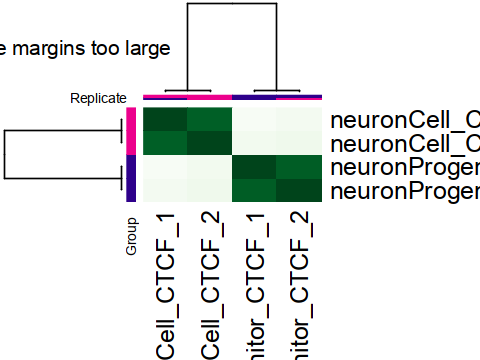

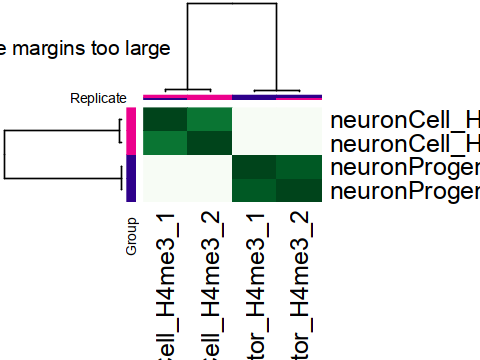

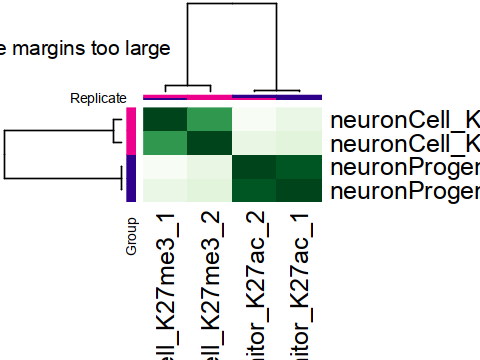

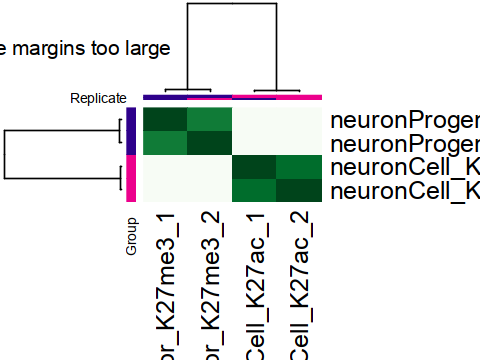

In [104]:
plot(CTCF.res,th = 0.01,contrast = 1,bUsePval = T)
plot(K4me3.res,th = 0.01,contrast = 1,bUsePval = T)
plot(K27me3.res,th = 0.01,contrast = 1,bUsePval = T)
plot(K27ac.res,th = 0.01,contrast = 1,bUsePval = T)

In [105]:
CTCF.peaks.dymanic <- dba.report(CTCF.res,th = 1,contrast = 1,bUsePval = F) %>% 
as.data.frame() %>% mutate(Fold=-Fold,group=case_when(FDR<=0.01 & Fold >=1 ~ "up",
                                                      FDR<=0.01 & Fold <=-1 ~ "down",
                                                      FDR>0.01 | abs(Fold) < 1 ~ "not"))
K4me3.peaks.dymanic <- dba.report(K4me3.res,th = 1,contrast = 1,bUsePval = F) %>% 
as.data.frame() %>% mutate(Fold=-Fold,group=case_when(FDR<=0.01 & Fold >=1 ~ "up",
                                                      FDR<=0.01 & Fold <=-1 ~ "down",
                                                      FDR>0.01 | abs(Fold) < 1 ~ "not"))
K27me3.peaks.dymanic <- dba.report(K27me3.res,th = 1,contrast = 1,bUsePval = F) %>% 
as.data.frame() %>% mutate(Fold=-Fold,group=case_when(FDR<=0.01 & Fold >=1 ~ "up",
                                                      FDR<=0.01 & Fold <=-1 ~ "down",
                                                      FDR>0.01 | abs(Fold) < 1 ~ "not"))
K27ac.peaks.dymanic <- dba.report(K27ac.res,th = 1,contrast = 1,bUsePval = F) %>% 
as.data.frame() %>% mutate(Fold=-Fold,group=case_when(FDR<=0.01 & Fold >=1 ~ "up",
                                                      FDR<=0.01 & Fold <=-1 ~ "down",
                                                      FDR>0.01 | abs(Fold) < 1 ~ "not"))

In [108]:
write.table(CTCF.peaks.dymanic,"./narrowpeaks/CTCF.NeuronToProgenitor.diffbind.bed",
            col.names = F,row.names = F,quote=F,sep="\t")
write.table(K4me3.peaks.dymanic,"./narrowpeaks/K4me3.NeuronToProgenitor.diffbind.bed",
            col.names = F,row.names = F,quote=F,sep="\t")
write.table(K27ac.peaks.dymanic,"./narrowpeaks/K27ac.NeuronToProgenitor.diffbind.bed",
            col.names = F,row.names = F,quote=F,sep="\t")
write.table(K27me3.peaks.dymanic,"./narrowpeaks/K27me3.NeuronToProgenitor.diffbind.bed",
            col.names = F,row.names = F,quote=F,sep="\t")

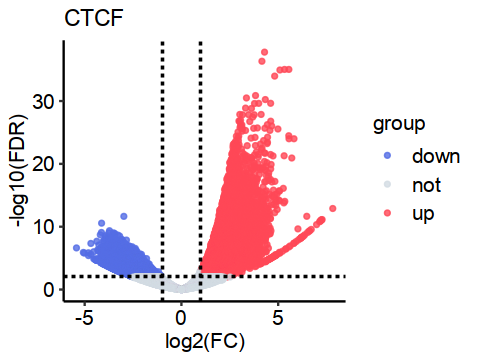

In [73]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(CTCF.peaks.dymanic, aes(x = Fold, y = -log10(FDR), colour=group)) +
  geom_point(alpha=.8, size=1) +
  scale_color_manual(values=c("#546de5", "#d2dae2","#ff4757"))+
  # 辅助线
  geom_vline(xintercept=c(-1,1),lty=2,col="black",lwd=.75) +
  geom_hline(yintercept = -log10(0.01),lty=2,col="black",lwd=.75) +
  # 坐标轴
  labs(x="log2(FC)",title = "CTCF",
       y="-log10(FDR)")+
  theme_classic()+
  # 图例
  theme(legend.position="right", 
        axis.text.x = element_text(color="black", size=12),
        axis.title.y = element_text(color="black", size=12),
        axis.title.x = element_text(color="black", size=12),
        legend.title = element_text(color="black", size=12),
        legend.text = element_text(color="black", size=12),
        axis.text.y = element_text(color="black", size=12)
      )

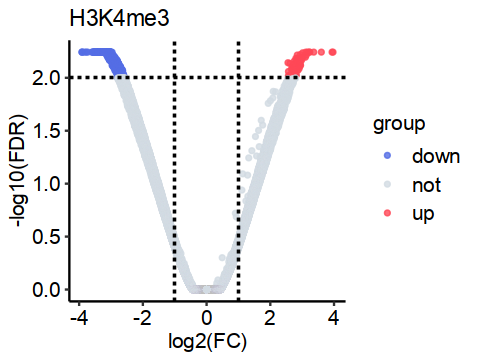

In [106]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(K4me3.peaks.dymanic, aes(x = Fold, y = -log10(FDR), colour=group)) +
  geom_point(alpha=.8, size=1) +
  scale_color_manual(values=c("#546de5", "#d2dae2","#ff4757"))+
  # 辅助线
  geom_vline(xintercept=c(-1,1),lty=2,col="black",lwd=.75) +
  geom_hline(yintercept = -log10(0.01),lty=2,col="black",lwd=.75) +
  # 坐标轴
  labs(x="log2(FC)",title = "H3K4me3",
       y="-log10(FDR)")+
  theme_classic()+
  # 图例
  theme(legend.position="right", 
        axis.text.x = element_text(color="black", size=12),
        axis.title.y = element_text(color="black", size=12),
        axis.title.x = element_text(color="black", size=12),
        legend.title = element_text(color="black", size=12),
        legend.text = element_text(color="black", size=12),
        axis.text.y = element_text(color="black", size=12)
      )

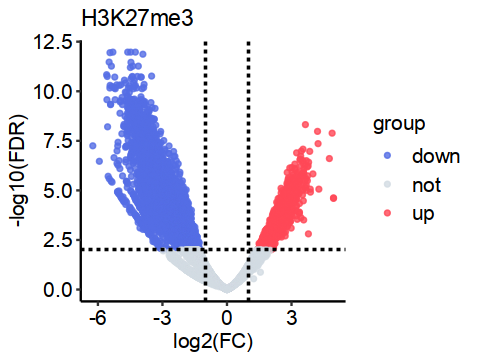

In [79]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(K27me3.peaks.dymanic, aes(x = Fold, y = -log10(FDR), colour=group)) +
  geom_point(alpha=.8, size=1) +
  scale_color_manual(values=c("#546de5", "#d2dae2","#ff4757"))+
  # 辅助线
  geom_vline(xintercept=c(-1,1),lty=2,col="black",lwd=.75) +
  geom_hline(yintercept = -log10(0.01),lty=2,col="black",lwd=.75) +
  # 坐标轴
  labs(x="log2(FC)",title = "H3K27me3",
       y="-log10(FDR)")+
  theme_classic()+
  # 图例
  theme(legend.position="right", 
        axis.text.x = element_text(color="black", size=12),
        axis.title.y = element_text(color="black", size=12),
        axis.title.x = element_text(color="black", size=12),
        legend.title = element_text(color="black", size=12),
        legend.text = element_text(color="black", size=12),
        axis.text.y = element_text(color="black", size=12)
      )

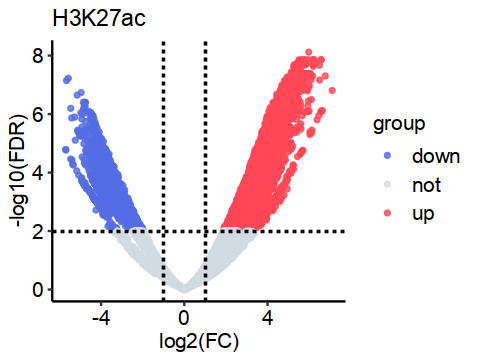

In [80]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(K27ac.peaks.dymanic, aes(x = Fold, y = -log10(FDR), colour=group)) +
  geom_point(alpha=.8, size=1) +
  scale_color_manual(values=c("#546de5", "#d2dae2","#ff4757"))+
  # 辅助线
  geom_vline(xintercept=c(-1,1),lty=2,col="black",lwd=.75) +
  geom_hline(yintercept = -log10(0.01),lty=2,col="black",lwd=.75) +
  # 坐标轴
  labs(x="log2(FC)",title = "H3K27ac",
       y="-log10(FDR)")+
  theme_classic()+
  # 图例
  theme(legend.position="right", 
        axis.text.x = element_text(color="black", size=12),
        axis.title.y = element_text(color="black", size=12),
        axis.title.x = element_text(color="black", size=12),
        legend.title = element_text(color="black", size=12),
        legend.text = element_text(color="black", size=12),
        axis.text.y = element_text(color="black", size=12)
      )

## final sta

In [55]:
K27ac <- data.frame(counts=c(1976,7971,7524,5550,23554,19750),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("stripes",3),rep("all",3)))

In [56]:
K27ac %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,5550,down,48854,11.36038
all,23554,not,48854,48.21304
all,19750,up,48854,40.42658
stripes,1976,down,17471,11.31017
stripes,7971,not,17471,45.62418
stripes,7524,up,17471,43.06565


In [57]:
K27me3 <- data.frame(counts=c(3035,2261,424,12152,8429,1044),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("stripes",3),rep("all",3)))

In [58]:
K27me3 %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,12152,down,21625,56.194220
all,8429,not,21625,38.978035
all,1044,up,21625,4.827746
stripes,3035,down,5720,53.059441
stripes,2261,not,5720,39.527972
stripes,424,up,5720,7.412587


In [59]:
CTCF <- data.frame(counts=c(3118,14654,9151,9703,47086,26334),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("stripes",3),rep("all",3)))

In [60]:
CTCF %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,9703,down,83123,11.67306
all,47086,not,83123,56.64617
all,26334,up,83123,31.68076
stripes,3118,down,26923,11.58118
stripes,14654,not,26923,54.42930
stripes,9151,up,26923,33.98953


In [61]:
CTCF <- data.frame(counts=c(165,1081,881,9703,47086,26334),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("loops",3),rep("all",3)))

In [62]:
CTCF %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,9703,down,83123,11.673063
all,47086,not,83123,56.646175
all,26334,up,83123,31.680762
loops,165,down,2127,7.757405
loops,1081,not,2127,50.822755
loops,881,up,2127,41.419840


In [65]:
K27me3 <- data.frame(counts=c(259,194,41,12152,8429,1044),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("loops",3),rep("all",3)))

In [66]:
K27me3 %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,12152,down,21625,56.194220
all,8429,not,21625,38.978035
all,1044,up,21625,4.827746
loops,259,down,494,52.429150
loops,194,not,494,39.271255
loops,41,up,494,8.299595


In [67]:
K27ac <- data.frame(counts=c(89,512,353,5550,23554,19750),
           dynamic=c("down","not","up","down","not","up"),
           treat=c(rep("loops",3),rep("all",3)))

In [68]:
K27ac %>% group_by(treat) %>% summarise(counts,dynamic,sum=sum(counts)) %>%
as.data.frame() %>% mutate(ratio=counts/sum*100)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'treat'. You can override using the `.groups` argument.


treat,counts,dynamic,sum,ratio
<chr>,<dbl>,<chr>,<dbl>,<dbl>
all,5550,down,48854,11.36038
all,23554,not,48854,48.21304
all,19750,up,48854,40.42658
loops,89,down,954,9.32914
loops,512,not,954,53.66876
loops,353,up,954,37.00210
